In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [3]:
# First few rows of the dataset for initial data inspection
print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


This dataset provides valuable information for understanding the patterns and causes of forest fires in Algeria, and can be used to predict future forest fires.

**Data Cleaning and Preprocessing - Handling Errors**

In [4]:
print(df.isnull().sum()) # Check for missing values

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


The previous output indicates that there are no missing values in any of the columns of the dataset. Each column has 0 null values. So we don't need to handle missing values.

In [5]:
# Analyze variable distributions
df.describe() # Summary statistics of the dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


The dataset contains 243 observations recorded in 2012, with multiple weather-related variables such as Temperature, Relative Humidity (RH), Wind Speed (Ws), Rain, and fire risk indices like FFMC, DMC, DC, ISI, BUI, and FWI.

The distribution of these indices suggests that dry fuel (FFMC), minimal rain (Rain), and moderate winds (Ws) are likely to drive fire danger, making these variables highly relevant for the prediction model.

The DC (Drought Code) has a high standard deviation (47.67), indicating a wide range of values across the dataset.

In [6]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


With the previous information of the data we can observe that the Classes column is not numeric type, therefore, we need to change its data type to numeric values to handle the NaN error

In [7]:
#Handling the Non-numeric error
print(df['Classes'].unique()) # Check the unique values in the Classes column before applying the mapping to ensure they match

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


With the previous output we can see that there are blank spaces that we have to erase to effectively transform the Classes column into numeric values

In [8]:
# Remove any leading or trailing spaces in the 'Classes' column
df['Classes'] = df['Classes'].str.strip()

print(df['Classes'].unique())  # Check the updated unique values

['not fire' 'fire']


In [9]:
# Convert 'Classes' to numeric
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})  # Adjust mapping as per actual values

print(df['Classes'])  # Check the updated 'Classes' column

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64


**Exploratory Data Analysis (EDA)**

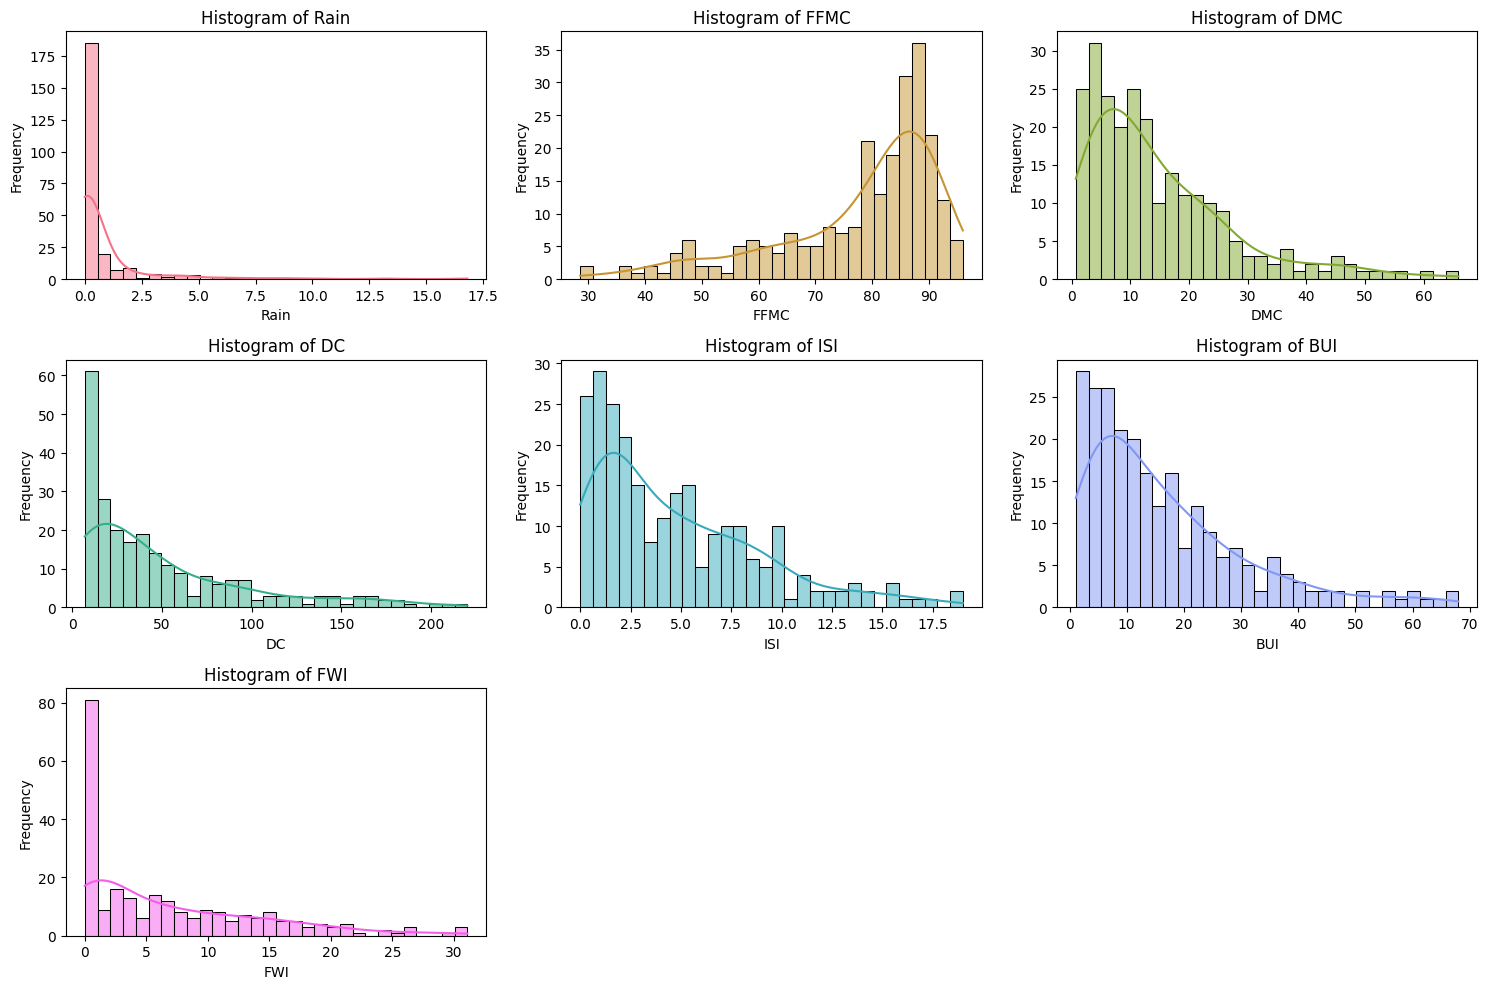

In [10]:
# Creating the histograms

# Get the float columns to visualize them
float_columns = df.select_dtypes(include=['float']).columns

# Set up the plot
num_cols = len(float_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, (num_cols // 3) * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create histograms for each float column
colors = sns.color_palette("husl", num_cols)  # Generate a color palette

for i, column in enumerate(float_columns):
    sns.histplot(df[column], bins=30, ax=axes[i], color=colors[i], kde=True)  # kde=True adds a density plot
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

By examining the histograms, we can draw meaningful conclusions about the underlying distributions, central tendencies, variability, outliers, and potential relationships between features. In this case, all the visualized features except for the FFMC (left skew) have a right skew distribution. Additionally, it is clear that the rain, DC and FWI features have a considerable number of outliers due to their high right skew distribution.

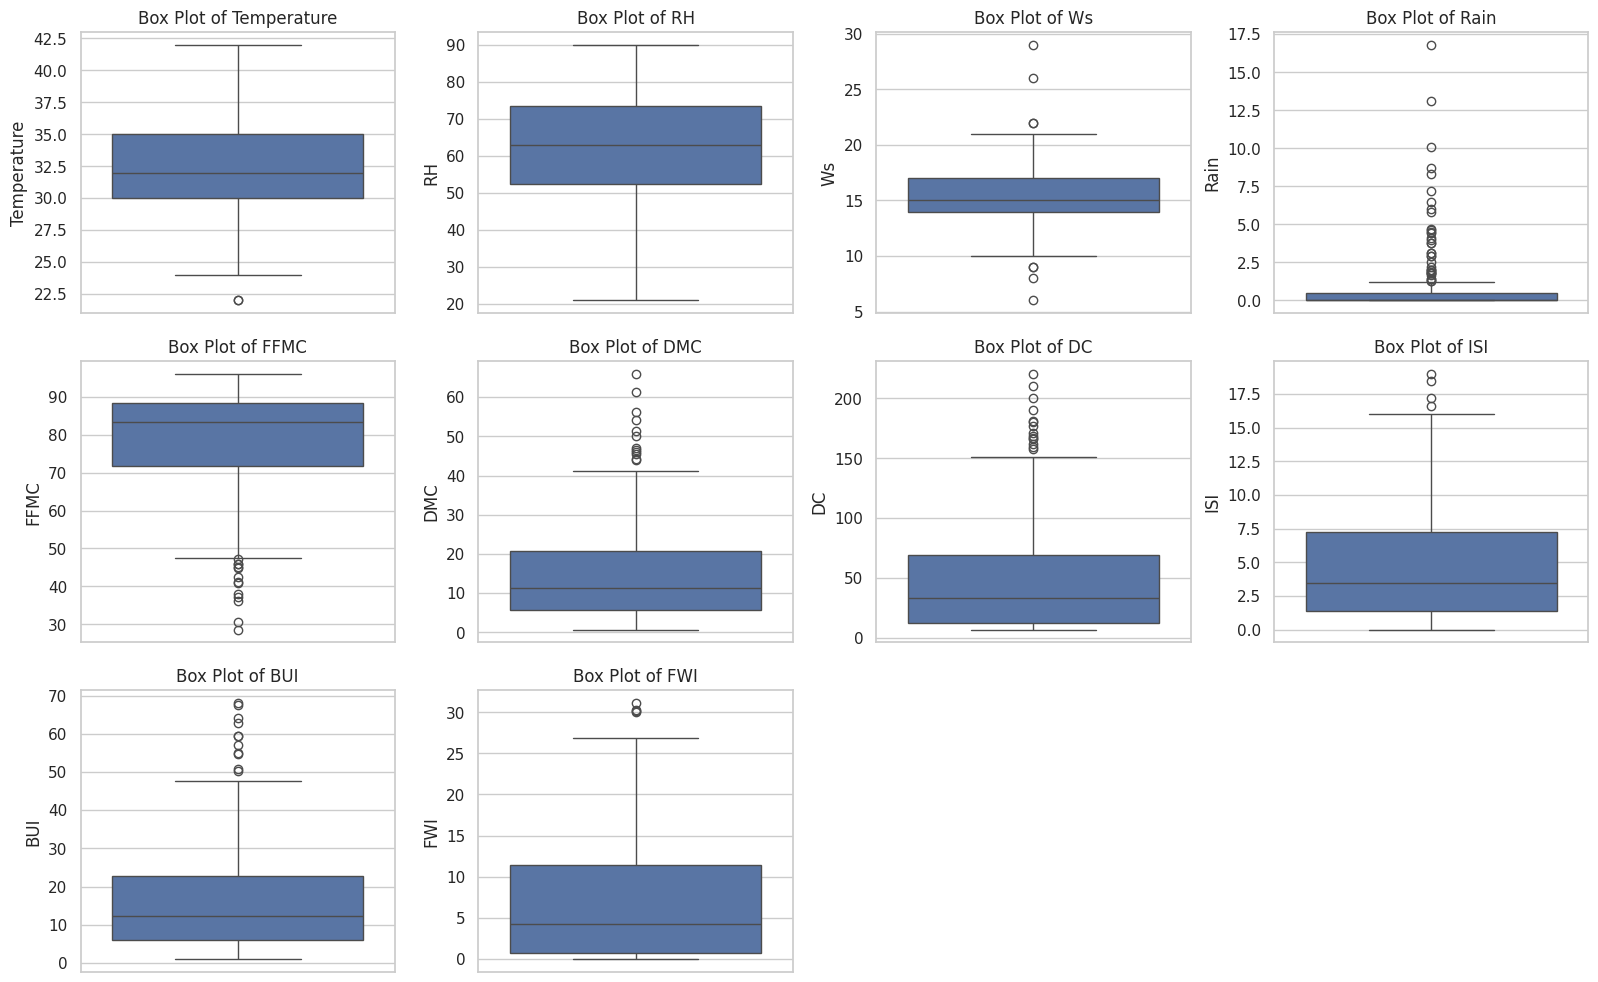

In [11]:
# Identify outliers using the boxplot method

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Plot boxplots for each numerical column
numerical_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Create subplots
plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In the boxplot we can see some outliers lying outside of the whiskers. We will use the interquartile range (IQR) method to remove them, so they will not affect our model.

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}, New dataset size: {df_no_outliers.shape[0]}")

Original dataset size: 243, New dataset size: 177


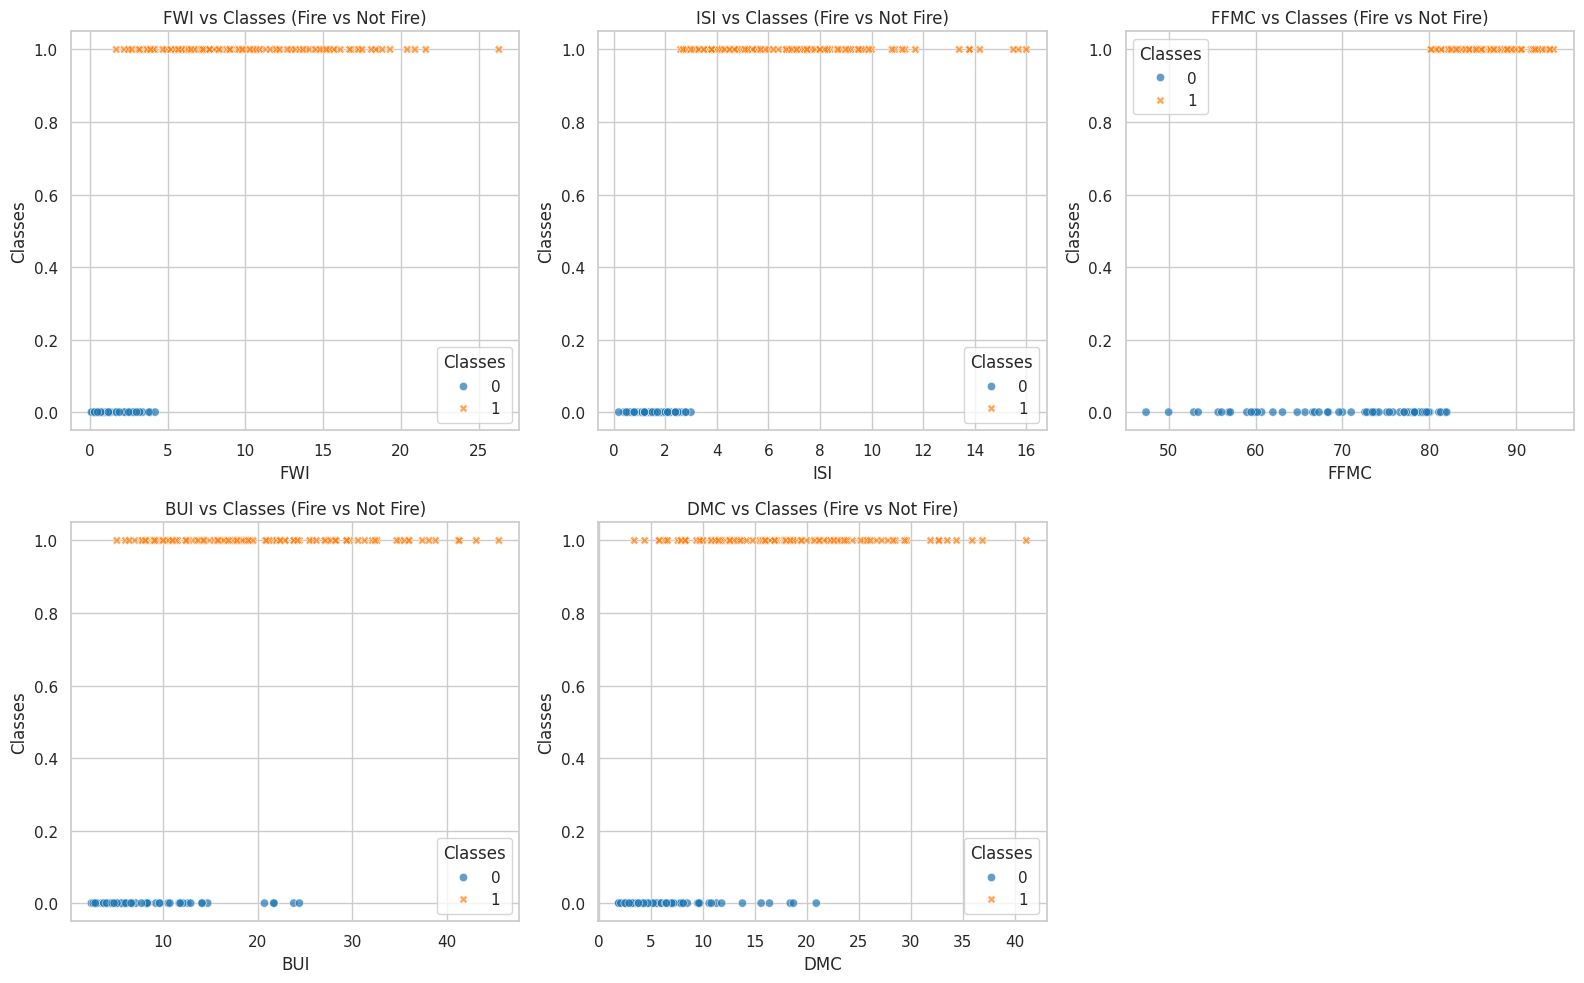

In [13]:
# Visualizing relationships with Scatter Plot

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Define the list of important variables
important_variables = ['FWI', 'ISI', 'FFMC', 'BUI', 'DMC']

# Define color palettes for the scatterplots
color_palettes = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

# Create scatterplots
plt.figure(figsize=(16, 10))
for i, var in enumerate(important_variables):
    plt.subplot(2, 3, i + 1)

    # Scatterplot with different colors for each variable and hue for fire classes
    sns.scatterplot(
        x=df_no_outliers[var], y=df['Classes'], hue=df['Classes'],
        palette=['#1f77b4', '#ff7f0e'],  # Blue for "not fire", Orange for "fire"
        style=df_no_outliers['Classes'], markers={0: 'o', 1: 'X'},  # Different markers for classes
        alpha=0.7
    )

    plt.title(f'{var} vs Classes (Fire vs Not Fire)')
    plt.xlabel(var)
    plt.ylabel('Classes')

plt.tight_layout()
plt.show()

In the previous scatterplots we observe how in most cases lower values ​​of FWI, ISI, FFMC , DMC, and BUI are correlated with cases in which there is no fire. On the contrary, higher values ​​of these variables generally correlate with the occurrence of fire.

**Feature Selection**

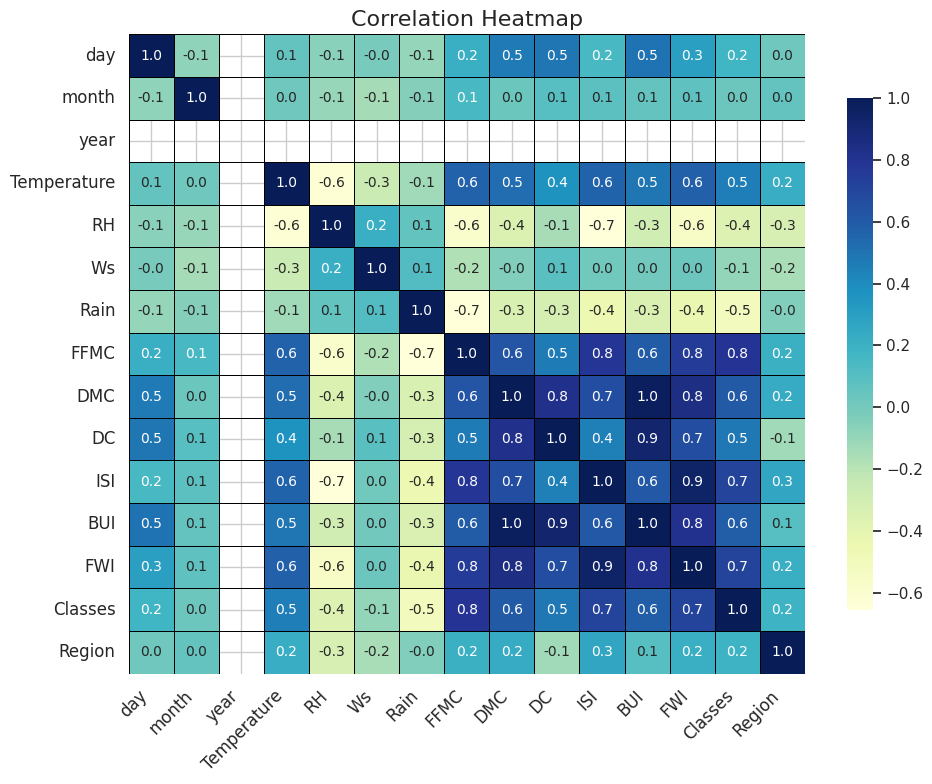

In [14]:
# Correlation matrix
corr_matrix = df_no_outliers.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='YlGnBu',
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black',
            annot_kws={"size": 10})

# Title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Analyzing the heat map, a clear correlation of the following variables with the "Classes" target can be observed:

*   FWI has a strong direct relationship of 0.7 with the target Classes
*   ISI has a strong direct relationship of 0.7 with the target Classes
*   FFMC has a strong direct relationship of 0.8 with the target Classes

These variables will be prioritized for inclusion in our model.

In contrast, the following features have little relation to the target variable of Classes and we'll exclude them in our model:

*   Month
*   Day
*   Ws
*   Region


In [15]:
# Set the threshold for correlation
corr_threshold = 0.2

# Identify features with correlation above the threshold
relevant_features = corr_matrix['Classes'][abs(corr_matrix['Classes']) > corr_threshold].index.tolist()

# Remove the target variable from the list of features
relevant_features.remove('Classes')

print("Relevant Features:", relevant_features)

Relevant Features: ['Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [16]:
# Separate the features (X) and the target variable (Y)

# Define the feature matrix (X) and target vector (Y)
X = df_no_outliers[relevant_features]  # Features excluding irrelevant columns
Y = df_no_outliers['Classes']  # Target variable

In [17]:
print(X.shape)  # Should be (n_samples, n_features)
print(Y.shape)  # Should be (n_samples,)

(177, 9)
(177,)


If the above shapes are incorrect, it can lead to errors or unexpected results during training or prediction. In this case the data is already in the correct format and dimensions

**MODEL BUILDING**

**Multiple Linear Regression**

In [18]:
# Let's apply multiple linear regression to predict the target Classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Apply linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluate performance
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print("Multiple Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R2:", lr_r2)

Multiple Linear Regression:
MSE: 0.0791418498040593
RMSE: 0.2813216127567509
MAE: 0.23604275732120625
R2: 0.6569637546954485


Based on the metrics:

MSE and RMSE: The values are relatively low, suggesting that the model's predictions are generally close to the actual values. However, there might still be some significant errors, as indicated by the MAE.

MAE: The MAE is moderate, indicating that while the model is generally accurate, there are some noticeable errors. This could be due to outliers or limitations in the model's ability to capture complex relationships in the data.

R²: The R² is moderate, suggesting that the model explains a significant portion of the variance in the target variable. However, there's still room for improvement, as not all the variance is explained.

**Polynomial Regression**

In [20]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_pred = poly_model.predict(X_poly_test)

# Evaluate performance
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
print("Polynomial Regression:")
print("MSE:", poly_mse)
print("RMSE:", poly_rmse)
print("MAE:", poly_mse)
print("R2:", poly_r2)

Polynomial Regression:
MSE: 0.2978281380068337
RMSE: 0.5457363264497185
MAE: 0.2978281380068337
R2: -0.29092062493931925


Polynomial Regression Metrics:

MSE: Higher than multiple linear regression, indicating larger average squared errors.

RMSE: Higher, also indicating larger average errors.

MAE: Higher, suggesting larger average absolute errors.

R²: Negative, indicating that the model is performing worse than a simple horizontal line (constant prediction).

The bad metrics of the polynomial regression can be explained because the data might not exhibit a strong non-linear relationship that polynomial regression can effectively capture.

**Regularization Models (Ridge and Lasso)**

In [21]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression:")
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("MAE:", ridge_mae)
print("R2:", ridge_r2)

Ridge Regression:
MSE: 0.07957696905849644
RMSE: 0.2820939011366542
MAE: 0.23675157181146617
R2: 0.6550777528434402


Comparison and Insights:

Multiple Linear Regression and Ridge Regression have very similar performance, with slightly lower MSE and RMSE for multiple linear regression.

Polynomial Regression is significantly outperforming the other two models, indicating that it's not a good fit for this dataset. This might be due to overfitting or the lack of a strong non-linear relationship in the data.

Ridge Regression offers similar performance with the added benefit of regularization, which can help prevent overfitting.

In [22]:
# Lasso Regression

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluate performance
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso Regression:")
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("MAE:", lasso_mae)
print("R2:", lasso_r2)

Lasso Regression:
MSE: 0.10499476436428597
RMSE: 0.3240289560583837
MAE: 0.276422649720062
R2: 0.5449056367354026


Comparison to Other Models:

Performance: Lasso regression's performance is slightly worse than multiple linear regression and Ridge regression, as indicated by the higher MSE, RMSE, and MAE, and lower R².

Feature Selection: Lasso regression is known for its ability to perform feature selection by shrinking the coefficients of less important features to zero. This can lead to simpler and more interpretable models.

**Cross-Validation and Hyperparameter Tuning**

In [23]:
# Cross-validation for Ridge Regression
ridge_cv_scores = cross_val_score(ridge_model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Evaluate performance
ridge_mse = -ridge_cv_scores.mean()
print(f'Ridge CV MSE: {ridge_mse}')
ridge_rmse = np.sqrt(ridge_mse)
print(f'Ridge CV RMSE: {ridge_rmse}')
y_pred = ridge_model.predict(X)  # Make predictions on the entire data
ridge_mae = mean_squared_error(Y, y_pred)  # Calculate MAE
ridge_r2 = r2_score(Y, y_pred)  # Calculate R²
print(f'Ridge CV MAE: {ridge_mae}')
print(f'Ridge CV R2: {ridge_r2}')

# Hyperparameter tuning for Ridge
parameters = {'alpha': [0.1, 1.0, 10.0]}
ridge_cv = GridSearchCV(Ridge(), parameters, cv=5)
ridge_cv.fit(X_train, y_train)

print(f'Best Ridge Alpha: {ridge_cv.best_params_}')

Ridge CV MSE: 0.08297547443819678
Ridge CV RMSE: 0.2880546379390493
Ridge CV MAE: 0.06930457621379373
Ridge CV R2: 0.6997728058349082
Best Ridge Alpha: {'alpha': 10.0}


Cross-Validation: The cross-validation metrics (MSE, RMSE, MAE, R²) are slightly higher than the original training set metrics, indicating that the model might be slightly overfitting the training data. However, the performance is still reasonable.

Hyperparameter Tuning: The best alpha value found was 10.0, suggesting that a higher regularization strength is beneficial for this model, likely helping to prevent overfitting.

Comparison with Other Models:

Ridge Regression: Despite the slight overfitting observed in cross-validation, Ridge regression still outperforms polynomial regression.

Multiple Linear Regression: While the original training set metrics were similar for Ridge and Multiple Linear Regression, the cross-validation results suggest that Ridge regression might be more robust to variations in the data.

**Save Model with Pickle**

In [24]:
# Save the best Ridge model
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_cv, f)

**Testing the Model on Unseen Data**

In [25]:
# Set a random seed for reproducibility
random_seed = 42

# Select random records as unseen data (for example, 20 records)
unseen_data = df_no_outliers.sample(n=20, random_state=random_seed)

# Display the selected unseen data
print(unseen_data)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI  \
25    26      6  2012           31  64  18   0.0  86.8  17.8  71.8   6.7   
53    24      7  2012           28  78  16   0.1  70.0   9.6  79.7   1.4   
185    4      8  2012           38  35  15   0.0  93.8  23.0  42.7  15.7   
36     7      7  2012           35  64  18   0.2  80.0   9.7  40.4   2.8   
75    15      8  2012           36  55  13   0.3  82.4  15.6  92.5   3.7   
22    23      6  2012           32  62  18   0.1  81.4   8.2  47.7   3.3   
156    5      7  2012           34  45  18   0.0  90.5  18.7  46.4  11.3   
237   25      9  2012           28  70  15   0.0  79.9  13.8  36.1   2.4   
144   23      6  2012           33  59  16   0.8  74.2   7.0   8.3   1.6   
189    8      8  2012           37  56  11   0.0  87.4  11.2  20.2   5.2   
30     1      7  2012           29  68  19   1.0  59.9   2.5   8.6   1.1   
223   11      9  2012           30  73  14   0.0  79.2   6.5  16.6   2.1   
48    19    

In [26]:
# Assuming 'Classes' is the target variable
X_unseen = unseen_data[relevant_features]  # Features excluding irrelevant columns
Y_actual = unseen_data['Classes']                   # Actual target variable


# X_unseen = pd.get_dummies(X_unseen, drop_first=True)  # One-hot encoding if needed

In [27]:
import joblib

# Load the model (make sure the path is correct)
model = joblib.load('ridge_model.pkl')

# Make predictions on the unseen data
Y_pred = model.predict(X_unseen)

# Display predictions
print("Predictions:", Y_pred)

Predictions: [ 0.94094537  0.24641118  1.28532816  0.52446973  0.59526702  0.57721678
  1.09634303  0.51746207  0.2471624   0.79543939 -0.12316196  0.52058908
  0.9279922   0.97036523  0.49612593  0.8870706   0.99177829  0.41419006
 -0.34052329  1.12058698]


In [28]:
# Assuming Y_actual and Y_pred contain continuous values, you can compute the metrics as follows:
mse = mean_squared_error(Y_actual, Y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(Y_actual, Y_pred)
r2 = r2_score(Y_actual, Y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0998
Root Mean Squared Error (RMSE): 0.3159
Mean Absolute Error (MAE): 0.2623
R-squared (R²): 0.5967


**Insights from Metrics:**

Mean Squared Error (MSE): The MSE indicates that the average squared difference between the predicted and actual values is relatively low, suggesting that the model's predictions are generally close to the actual values.

Root Mean Squared Error (RMSE): The RMSE value, being in the same unit as the target variable, provides a clear picture of the average error in predictions. An RMSE of about 0.316 means that, on average, the model's predictions are off by this amount, which can be considered reasonable.

Mean Absolute Error (MAE): The MAE indicates the average absolute difference between the predicted and actual values. It provides a direct measure of average error without the squaring, which can sometimes exaggerate larger errors. An MAE of 0.2623 suggests that the model is quite accurate in its predictions on average.

R-squared (R²): An R² value of approximately 0.597 indicates that about 59.67% of the variability in the target variable can be explained by the features used in the model. This is a moderate level of explanatory power. While it's not exceptionally high, it does suggest that the model captures a significant portion of the variance.

Conclusions

Model Performance: Overall, the model performs reasonably well, with the MAE and RMSE indicating that it makes relatively accurate predictions. However, there is still room for improvement, particularly in increasing the R² value, which suggests that the model might be missing some important information or features that could enhance its predictive power.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# If the model outputs probabilities, convert them to binary class labels
# If Y_pred is continuous, convert it to binary using a threshold
if len(Y_pred.shape) > 1:  # Check if Y_pred is 2D (probabilities)
    Y_pred_binary = (Y_pred[:, 1] > 0.5).astype(int)  # Assuming binary classification with probabilities
else:
    Y_pred_binary = (Y_pred > 0.5).astype(int)  # For other cases

# Now calculate the classification report
report = classification_report(Y_actual, Y_pred_binary, output_dict=True)
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_actual, Y_pred_binary)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

{'0': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 9.0}, '1': {'precision': 0.7857142857142857, 'recall': 1.0, 'f1-score': 0.88, 'support': 11.0}, 'accuracy': 0.85, 'macro avg': {'precision': 0.8928571428571428, 'recall': 0.8333333333333333, 'f1-score': 0.8400000000000001, 'support': 20.0}, 'weighted avg': {'precision': 0.8821428571428571, 'recall': 0.85, 'f1-score': 0.844, 'support': 20.0}}
Confusion Matrix:
 [[ 6  3]
 [ 0 11]]


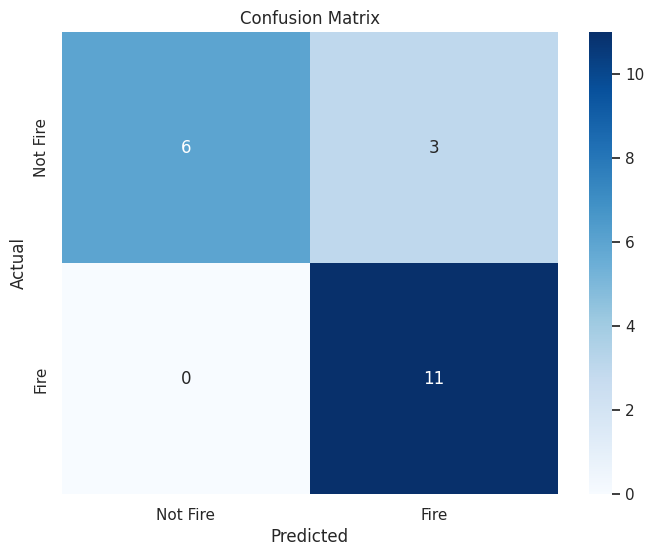

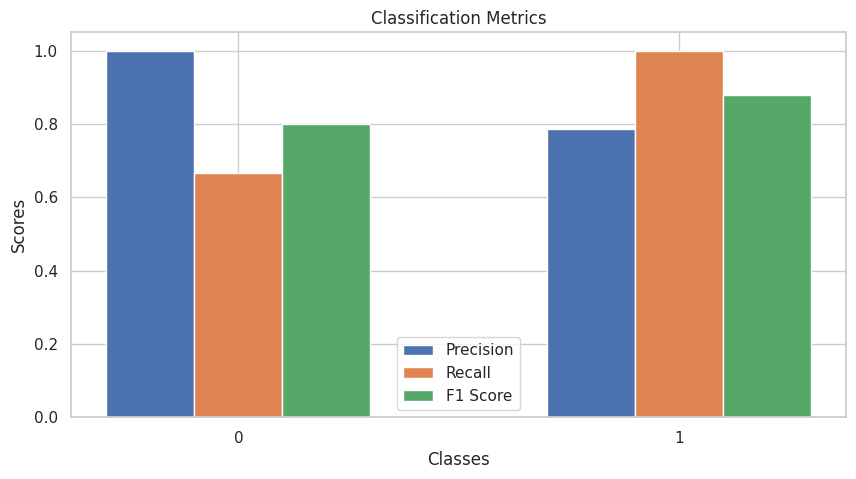

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting the classification report metrics
labels = list(report.keys())[:-3]  # Exclude the 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1_score, width=0.2, label='F1 Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Metrics')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

**Insights:**

**Class 0 (Not Fire):**

Precision: 1.0

This indicates that every instance predicted as Class 0 (no fire) is correct. The model does not produce false positives for Class 0, which is excellent for minimizing unnecessary alarms.

Recall: 0.62

This means that the model only identifies 62% of the actual instances of Class 0. There are a significant number of false negatives, suggesting that some actual "no fire" cases are being misclassified.

F1 Score: 0.8

This value reflects a balance between precision and recall, indicating a reasonable performance but slightly influenced by the recall value being lower.

**Class 1 (Fire):**

Precision: 0.78

About 78% of the instances predicted as Class 1 are correct, meaning there are some false positives. While this is relatively high, it shows that some cases predicted as fire may actually be no fire.

Recall: 1.0

The model correctly identifies all instances of Class 1. There are no false negatives for Class 1, indicating that it effectively captures all fire cases.

F1 Score: 0.83

This score shows a good balance, with strong performance due to perfect recall.

**Conclusions:**

Imbalanced Performance: The model performs very well for Class 1 (fire) but struggles with Class 0 (not fire). While it accurately predicts all fire instances, it fails to capture a significant number of non-fire instances, which may lead to a potential risk of under-reporting fire events.

Precision vs. Recall Trade-off: The high precision for Class 0 suggests that the model is conservative in making predictions (it only predicts "no fire" when it's very sure). However, this approach results in missed actual "no fire" cases, affecting recall negatively. Conversely, for Class 1, the model effectively identifies fires, albeit at the cost of some precision.

Model Reliability: While the F1 scores are decent, they indicate that the model is not equally reliable for both classes. Depending on the application, this might necessitate further tuning or a reconsideration of the model choice to improve its ability to predict Class 0 without sacrificing performance on Class 1.

Potential Improvements:

Data Balancing: Investigate the class distribution in the training data. If Class 0 is underrepresented, consider techniques like resampling, or using cost-sensitive training methods to enhance model performance for that class.